## Decision Tree Practical Assignment 

Assignment

Predicting Survival in the Titanic Data Set

We will be using a decision tree to make predictions about the Titanic data
set from Kaggle. This data set provides information on the Titanic
passengers and can be used to predict whether a passenger survived or
not.

Loading Data and modules

import numpy as np

import pandas as pd

import seaborn as sb

import matplotlib.pyplot as plt

import sklearn

from pandas import Series, DataFrame

from pylab import rcParams

from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression

from sklearn.cross_validation import train_test_split

from sklearn import metrics

from sklearn.metrics import classification_report

Url = https://raw.githubusercontent.com/BigDataGal/Python-for-Data-
Science/master/titanic-train.csv

titanic = pd.read_csv(url)

titanic.columns =
['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ti
cket','Fare','Cabin','E mbarked']

You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
(Parents/children aboard), and Fare to predict whether a passenger
survived.

Task: Deploy this assignment in any cloud platform.(Try to look for free cloud platform)

Assignment: Submit assignment’s deployable link only.


In [2]:
import numpy as np

import pandas as pd

import seaborn as sb

import matplotlib.pyplot as plt

import sklearn

from pandas import Series, DataFrame

from pylab import rcParams

from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.metrics import classification_report

In [5]:
URL_Path = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

In [6]:
Data = pd.read_csv(URL_Path)
Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
## Checking the NUll values
Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

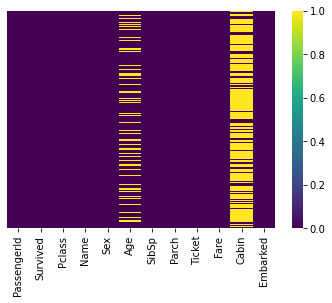

In [12]:
# NUll values Visualisation
import seaborn as sns
sns.heatmap(Data.isnull(),cmap='viridis',yticklabels=False)

In [13]:
### Sincce Cabin Has lots of Null values we can drop it
Data = Data.drop('Cabin',axis=1)
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [27]:
## Fill the Null values of Age with the Midean of Median
Data["Age"].fillna(Data["Age"].median(),inplace=True)
Data["Age"]


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [28]:
## Droping the remaining Null Values in Embarked 
Data.dropna(inplace=True)

In [29]:
#Checking
Data.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

C:\Users\sayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


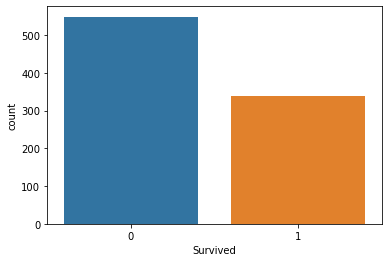

In [33]:
sns.countplot(Data['Survived'])
plt.show()

In [35]:
Independent_Features = Data.drop(['PassengerId', 'Survived','Name', 'Ticket','Embarked'],axis=1)
Dependent_Feature = Data['Survived']

In [49]:
## Changing the cAtegorical variables to numerical variables
Independent_Features['Sex'] = pd.get_dummies(Independent_Features['Sex']).values


In [50]:
Independent_Features

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,3,1,28.0,1,2,23.4500
889,1,0,26.0,0,0,30.0000


In [53]:
## splitting
X_train,X_test,y_train,y_test = train_test_split(Independent_Features,Dependent_Feature,test_size=0.3,random_state=50)

In [56]:
## Applying decision Tree
from sklearn.tree import DecisionTreeClassifier
DTC_Model = DecisionTreeClassifier()
DTC_Model.fit(X_train,y_train)


DecisionTreeClassifier()

In [65]:
## Accuracy
DTC_Model.score(X_test,y_test)

0.7602996254681648

In [58]:
## Prediction (y_predicted)
Prediction = DTC_Model.predict(X_test)
Prediction

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0], dtype=int64)

In [66]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [68]:
## Accuracy
Accuracy = accuracy_score(y_true=y_test,y_pred=Prediction)

Accuracy

0.7602996254681648

In [69]:
## Confusion Matrix
con_matrix = confusion_matrix(y_true=y_test,y_pred=Prediction)
con_matrix

array([[139,  24],
       [ 40,  64]], dtype=int64)

In [71]:
print(f"Cf_report : {classification_report(y_test,Prediction)}")

Cf_report :               precision    recall  f1-score   support

           0       0.78      0.85      0.81       163
           1       0.73      0.62      0.67       104

    accuracy                           0.76       267
   macro avg       0.75      0.73      0.74       267
weighted avg       0.76      0.76      0.76       267



In [72]:
# Standardizing the X column before hyper tuning
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

X_transform = scalar.fit_transform(Independent_Features)

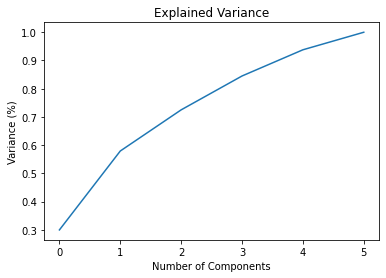

In [74]:
# Using PCA for increasing Model Accuracy
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(X_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [76]:
pca = PCA(n_components=5)
new_data = pca.fit_transform(X_transform)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5'])

principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5
0,-0.934393,-0.864946,0.567210,0.330329,-0.365303
1,1.513279,1.336488,-0.742556,-0.003377,-1.029220
2,-0.456308,-0.496696,-1.594020,-0.097189,-0.320439
3,1.314568,1.101634,-0.838452,0.037132,-1.031778
4,-1.305752,0.073387,0.300741,-0.308773,0.114675
...,...,...,...,...,...
884,-0.767364,0.422287,0.293072,0.441816,0.160279
885,0.737923,0.657858,-1.476609,0.956799,-0.298993
886,1.246881,-1.558141,-0.824565,-1.231817,0.748507
887,-0.108472,1.141531,0.398088,0.864423,0.156339


In [77]:
## splitting again
X_train,X_test,y_train,y_test = train_test_split(principal_x,Dependent_Feature,test_size = 0.30, random_state= 101)

In [78]:
#by tuning hyper parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [80]:
# Using GridSearchCV

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=DTC_Model,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [82]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [83]:
## Finding Best Parameters

best_parameters=grid_search.best_params_
print(best_parameters)

grid_search.best_score_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}


0.8023096774193548

In [85]:
# Applying best params in Decision Tree

DTC_Model2 = DecisionTreeClassifier(criterion = 'entropy', max_depth =4, min_samples_leaf= 6,min_samples_split=7, splitter ='random')

DTC_Model2 .fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=6,
                       min_samples_split=7, splitter='random')

In [89]:
## Prediction
y_pred = DTC_Model2.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [90]:
## Checking Accuracy
accuracy_score(y_test,y_pred)

0.8164794007490637

In [87]:
## Accuracy
DTC_Model2.score(X_test,y_test)


0.8164794007490637

In [ ]:
import pickle

with open('DTCmodelForprediction.sav','wb') as f:
    pickle.dump(DTC_Model2,f)
    
## THe preprocessinf and Feature engineering pickle file

with open ('StandardScaler.sav','wb') as f:
    pickle.dump(scalar,f)
    
with open ('PCAmodel.sav','wb') as f:
    pickle.dump(pca,f)